In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
raw_counts = {
    "apnews": 6536,
    "bbc": 4934,
    "cnn": 3108,
    "dailymail": 9562,
    "foxnews": 9324,
    "guardian": 8148,
    "hindustantimes": 4790,
    "independent": 9240,
    "india": 743,
    "indianexpress": 4331,
    "nbc": 2353,
    "news18": 3196,
    "newsweek": 5722,
    "nypost": 4125,
    "usatoday": 2656
}

In [ ]:
newssite_formatting = {
            'apnews': 'AP News',
            'bbc' : 'BBC',
            'cnn' : 'CNN',
            'foxnews' : 'Fox News',
            'dailymail' : 'Dailymail',
            'guardian' : 'Guardian',
            'hindustantimes' : 'Hindustan Times',
            'india' : 'India',
            'independent' : 'Independent',
            'indianexpress' : 'Indian Express',
            'news18': 'News 18',
            'nbc' : 'NBC',
            'nypost' : 'NY Post',
            'newsweek' : 'Newsweek',
            'usatoday' : 'USA Today'
        }

In [ ]:
df = pd.DataFrame(list(raw_counts.items()), columns=["Newssite", "Count"])
df['Newssite'] = df['Newssite'].map(newssite_formatting)

In [ ]:
def newssite_to_region(newssite):
      if newssite in ['Dailymail', 'Independent', 'Guardian', 'BBC']:
        return 'UK'
      elif newssite in ['Hindustan Times', 'India', 'Indian Express', 'News 18']:
        return 'India'
      else:
        return 'US'

In [ ]:
df['Region']  = df['Newssite'].apply(newssite_to_region)

In [ ]:
df['Count'].describe()['std']

np.float64(2778.0915648799523)

In [ ]:
region_cols = {
    'US' : '#648FFF',
    'UK' : '#DC267F' ,
    'India' : '#FFB000'
}

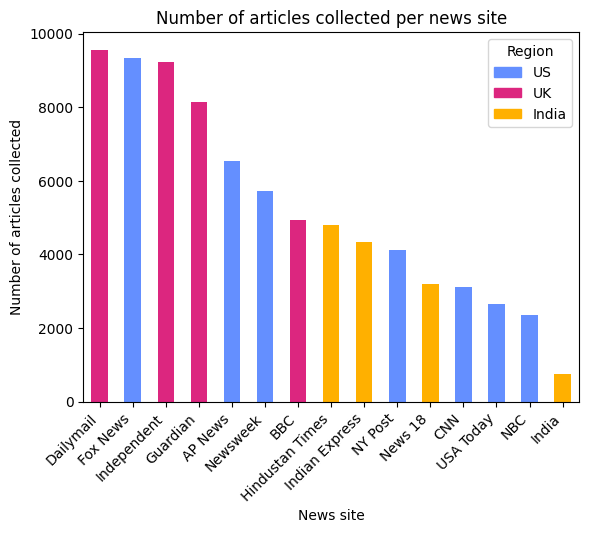

In [ ]:
df_sorted = df.sort_values(by='Count', ascending=False)

ax = df_sorted.plot(kind="bar", x='Newssite', y='Count', legend=False, color=df_sorted['Region'].map(region_cols))

ax.set_ylabel("Number of articles collected")
ax.set_xlabel("News site")
ax.set_title("Number of articles collected per news site")
ax.set_xticklabels(df_sorted['Newssite'], rotation=45, ha="right")


us_patch = mpatches.Patch(color=region_cols['US'], label='US')
uk_patch = mpatches.Patch(color=region_cols['UK'], label='UK')
india_patch = mpatches.Patch(color=region_cols['India'], label='India')

ax.legend(handles=[us_patch, uk_patch, india_patch], title='Region')

ax.figure.savefig('rawcountarticles.png', bbox_inches="tight")

In [ ]:
df['Count'].mean()

np.float64(5251.2)

In [ ]:
after_preprocessing = {
    "AP News": 5953,
    "BBC": 3586,
    "CNN": 2927,
    "Dailymail": 9188,
    "Fox News": 9030,
    "Guardian": 8147,
    "Hindustan Times": 4587,
    "Independent": 9131,
    "India": 415,
    "Indian Express": 3761,
    "NBC": 2084,
    "News 18": 3191,
    "Newsweek": 4860,
    "NY Post": 4118,
    "USA Today": 2626
}


In [ ]:
df['After Preprocessing'] = df['Newssite'].map(after_preprocessing)

In [ ]:
df['Difference'] = df['Count'] - df['After Preprocessing']
df['Percentage Difference'] = df['Difference'] / df['Count'] * 100
df.sort_values(by='Percentage Difference', ascending=False)

,Newssite,Count,Region,After Preprocessing,Difference,Percentage Difference
8,India,743,India,415,328,44.145357
1,BBC,4934,UK,3586,1348,27.320632
12,Newsweek,5722,US,4860,862,15.064663
9,Indian Express,4331,India,3761,570,13.160933
10,NBC,2353,US,2084,269,11.432214
0,AP News,6536,US,5953,583,8.919829
2,CNN,3108,US,2927,181,5.823681
6,Hindustan Times,4790,India,4587,203,4.237996
3,Dailymail,9562,UK,9188,374,3.911316
4,Fox News,9324,US,9030,294,3.153153


In [ ]:
100 - (df['After Preprocessing'].sum() / df['Count'].sum() * 100)

np.float64(6.555961811903316)

In [ ]:
df.drop(columns=["Difference"], inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
def newssite_to_region(newssite):
      if newssite in ['Dailymail', 'Independent', 'Guardian', 'BBC']:
        return 'UK'
      elif newssite in ['Hindustan Times', 'India', 'Indian Express', 'News 18']:
        return 'India'
      else:
        return 'US'

In [ ]:
df['Region'] = df['Newssite'].apply(newssite_to_region)

In [ ]:
df['Percentage Kept']  = df['After Preprocessing'] / df['Count'] * 100

In [ ]:
df.sort_values(by='Percentage Kept', ascending=False)

,Newssite,Count,After Preprocessing,Percentage Difference,Region,Percentage Kept
5,Guardian,8148,8147,0.012273,UK,99.987727
11,News 18,3196,3191,0.156446,India,99.843554
13,NY Post,4125,4118,0.169697,US,99.830303
14,USA Today,2656,2626,1.129518,US,98.870482
7,Independent,9240,9131,1.179654,UK,98.820346
4,Fox News,9324,9030,3.153153,US,96.846847
3,Dailymail,9562,9188,3.911316,UK,96.088684
6,Hindustan Times,4790,4587,4.237996,India,95.762004
2,CNN,3108,2927,5.823681,US,94.176319
0,AP News,6536,5953,8.919829,US,91.080171


In [ ]:
df['sum'] = df['Percentage Difference'] + df['Percentage Kept']
df

,Newssite,Count,After Preprocessing,Percentage Difference,Region,Percentage Kept,sum
0,AP News,6536,5953,8.919829,US,91.080171,100.0
1,BBC,4934,3586,27.320632,UK,72.679368,100.0
2,CNN,3108,2927,5.823681,US,94.176319,100.0
3,Dailymail,9562,9188,3.911316,UK,96.088684,100.0
4,Fox News,9324,9030,3.153153,US,96.846847,100.0
5,Guardian,8148,8147,0.012273,UK,99.987727,100.0
6,Hindustan Times,4790,4587,4.237996,India,95.762004,100.0
7,Independent,9240,9131,1.179654,UK,98.820346,100.0
8,India,743,415,44.145357,India,55.854643,100.0
9,Indian Express,4331,3761,13.160933,India,86.839067,100.0


In [ ]:
month_counts = {
    "2024-06": 4097,
    "2024-07": 3630,
    "2024-05": 6662,
    "2024-04": 6815,
    "2024-03": 4620,
    "2024-02": 5634,
    "2024-01": 5577,
    "2023-12": 6126,
    "2024-08": 3927,
    "2023-11": 9708,
    "2023-10": 11218,
    "2024-10": 1747,
    "2024-09": 3843
}

In [ ]:
date_df = pd.DataFrame(list(month_counts.items()), columns=["Date", "Count"])

In [ ]:
date_df.sort_values(by='Date', inplace=True)

In [ ]:
date_df.reset_index(drop=True, inplace=True)

In [ ]:
date_df

,Date,Count
0,2023-10,11218
1,2023-11,9708
2,2023-12,6126
3,2024-01,5577
4,2024-02,5634
5,2024-03,4620
6,2024-04,6815
7,2024-05,6662
8,2024-06,4097
9,2024-07,3630


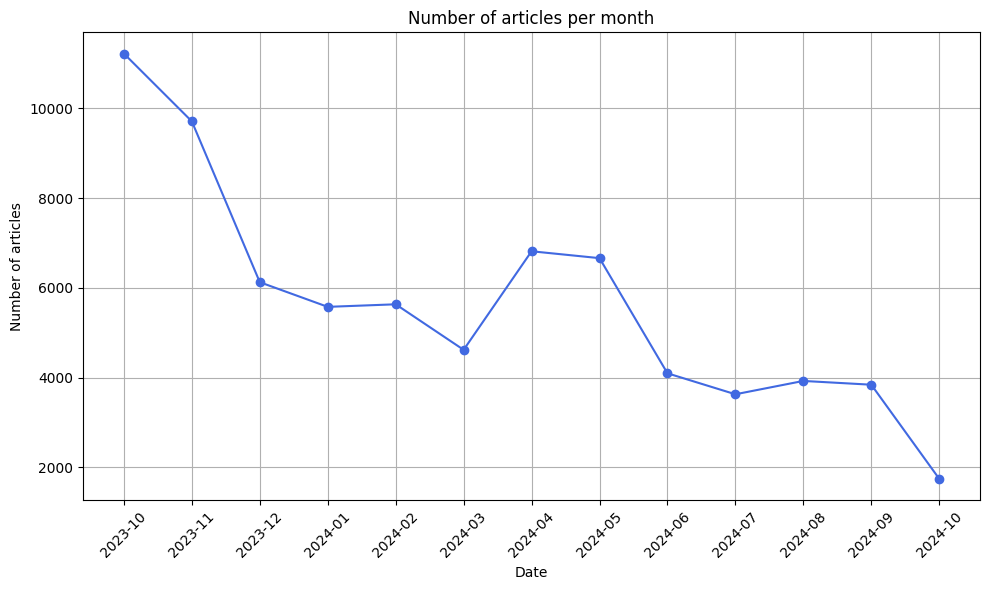

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(date_df['Date'], date_df['Count'], marker='o', color='royalblue')
plt.title('Number of articles per month')
plt.xlabel('Date')
plt.ylabel('Number of articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

In [ ]:
region_counts = {
    "US": {
        "2024-06": 2289,
        "2024-07": 1959,
        "2024-05": 3699,
        "2024-04": 3789,
        "2024-03": 2498,
        "2024-02": 3122,
        "2024-01": 3129,
        "2023-12": 3346,
        "2024-08": 2312,
        "2023-11": 5181,
        "2023-10": 5565,
        "2024-10": 811,
        "2024-09": 2045
    },
    "UK": {
        "2024-02": 1830,
        "2024-01": 1618,
        "2024-04": 1906,
        "2023-12": 1690,
        "2024-05": 1852,
        "2024-03": 1475,
        "2023-11": 3050,
        "2024-08": 1063,
        "2024-10": 557,
        "2023-10": 3556,
        "2024-07": 1101,
        "2024-09": 1108,
        "2024-06": 1099
    },
    "India": {
        "2023-12": 1090,
        "2024-05": 1111,
        "2024-04": 1120,
        "2024-03": 647,
        "2024-02": 682,
        "2024-01": 830,
        "2023-11": 1477,
        "2023-10": 2097,
        "2024-10": 379,
        "2024-09": 690,
        "2024-08": 552,
        "2024-07": 570,
        "2024-06": 709
    }
}

In [ ]:
date_df_us = pd.DataFrame(list(region_counts['US'].items()), columns=["Date", "Count"])
date_df_uk = pd.DataFrame(list(region_counts['UK'].items()), columns=["Date", "Count"])
date_df_india = pd.DataFrame(list(region_counts['India'].items()), columns=["Date", "Count"])

In [ ]:
date_df_india['Region'] = 'India'
date_df_uk['Region'] = 'UK'
date_df_us['Region'] = 'US'

In [ ]:
date_df_us.sort_values(by='Date', inplace=True)
date_df_uk.sort_values(by='Date', inplace=True)
date_df_india.sort_values(by='Date', inplace=True)

date_df_us.reset_index(drop=True, inplace=True)
date_df_uk.reset_index(drop=True, inplace=True)
date_df_india.reset_index(drop=True, inplace=True)

In [ ]:
date_df_all_regions = pd.concat([date_df_us, date_df_uk, date_df_india])

In [ ]:
date_df_all_regions.sort_values(by='Date', inplace=True)
date_df_all_regions.reset_index(drop=True, inplace=True)

In [ ]:
date_df_all_regions

,Date,Count,Region
0,2023-10,2097,India
1,2023-10,3556,UK
2,2023-10,5565,US
3,2023-11,3050,UK
4,2023-11,1477,India
5,2023-11,5181,US
6,2023-12,1690,UK
7,2023-12,3346,US
8,2023-12,1090,India
9,2024-01,3129,US


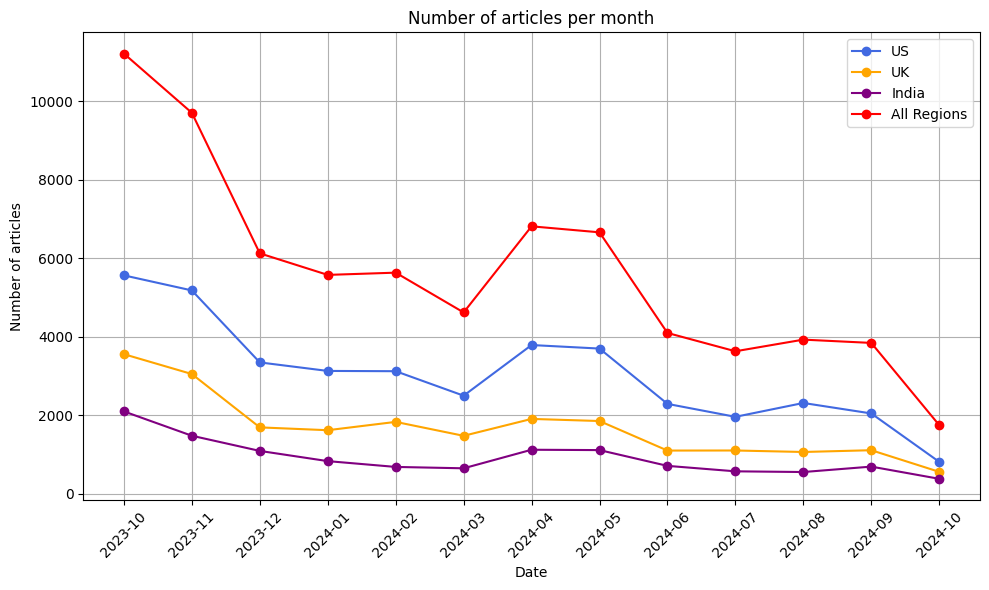

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(date_df_us['Date'], date_df_us['Count'], marker='o', color='royalblue', label="US")
plt.plot(date_df_uk['Date'], date_df_uk['Count'], marker='o', color='orange', label="UK")
plt.plot(date_df_india['Date'], date_df_india['Count'], marker='o', color='purple', label="India")
plt.plot(date_df['Date'], date_df['Count'], marker='o', color='red', label="All Regions")
plt.legend(loc="upper right")
plt.title('Number of articles per month')
plt.xlabel('Date')
plt.ylabel('Number of articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.savefig('articlespermonth.png')

In [ ]:
headine_body_counts = {
    "palestine": {
        "headline": 2247,
        "text": 40403
    },
    "palestinian": {
        "headline": 7167,
        "text": 191803
    },
    "israel": {
        "headline": 26672,
        "text": 489986
    },
    "israeli": {
        "headline": 10729,
        "text": 268108
    },
    "gaza": {
        "headline": 17979,
        "text": 332677
    },
    "hamas": {
        "headline": 15275,
        "text": 282010
    },
    "idf": {
        "headline": 1247,
        "text": 36244
    },
    "october 7th": {
        "headline": 1122,
        "text": 40769
    }
}

In [ ]:
headline_body = {
    "word" : ['palestine', 'palestinian', 'israel', 'israeli', 'gaza', 'hamas', 'idf', 'october 7th'],
    "headline" : [2247, 7167, 26672, 10729, 17979, 15275, 1247, 1122],
    "text" : [40403, 191803, 489986, 268108, 332677, 282010, 36244, 40769]
}

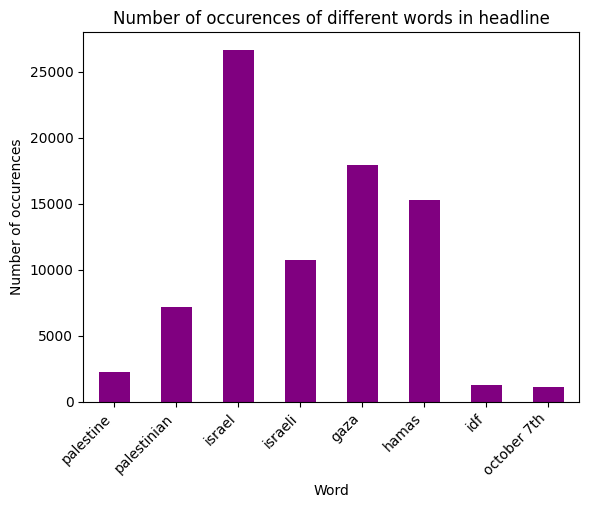

In [ ]:
hb_df = pd.DataFrame(headline_body)
ax = hb_df.plot(kind='bar', x='word', y='headline', legend=False, color='purple', xlabel='Word', title="Number of occurences of different words in headline", ylabel="Number of occurences")
ax.set_xticklabels(hb_df['word'], rotation=45, ha="right")

ax.figure.savefig('headlinewordoccurences.png', bbox_inches="tight")

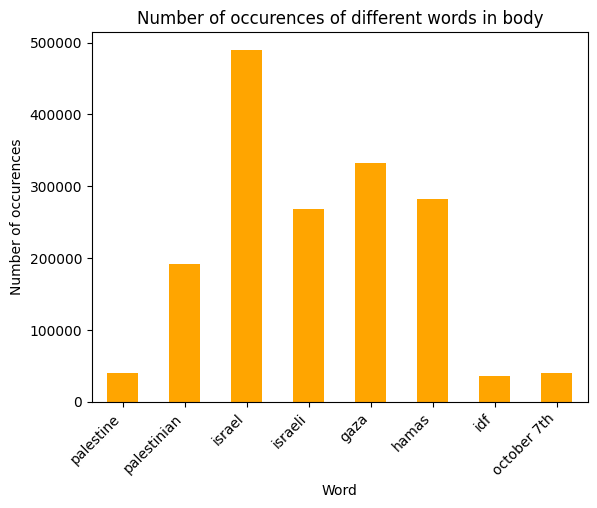

In [ ]:
ax = hb_df.plot(kind='bar', x='word', y='text', legend=False, color='orange', title="Number of occurences of different words in body", ylabel="Number of occurences", xlabel='Word')
ax.set_xticklabels(hb_df['word'], rotation=45, ha="right")
ax.figure.savefig('bodywordoccurences.png', bbox_inches="tight")

In [ ]:
hb_df[hb_df['word'] == 'idf']['headline']

,headline
6,1247


In [ ]:
hb_df.sort_values(by='text', ascending=True)

,word,headline,text
6,idf,1247,36244
0,palestine,2247,40403
7,october 7th,1122,40769
1,palestinian,7167,191803
3,israeli,10729,268108
5,hamas,15275,282010
4,gaza,17979,332677
2,israel,26672,489986


In [ ]:
headline_newssite_formatting = {
        "ap": "AP News",
        "bbc": "BBC",
        "cnn": "CNN",
        "dailymail": "Dailymail",
        "foxnews": "Fox News",
        "guardian": "Guardian",
        "hindustantimes": "Hindustan Times",
        "independentuk": "Independent",
        "india": "India",
        "indianexpress": "Indian Express",
        "nbc": "NBC",
        "news18": "News 18",
        "newsweek": "Newsweek",
        "nypost": "NY Post",
        "usatoday" : "USA Today"
}

In [ ]:
headline = {
    "palestine": {
        "ap": 16,
        "bbc": 43,
        "cnn": 10,
        "dailymail": 671,
        "foxnews": 129,
        "guardian": 202,
        "hindustantimes": 268,
        "independentuk": 402,
        "india": 31,
        "indianexpress": 210,
        "nbc": 16,
        "news18": 154,
        "newsweek": 36,
        "nypost": 42,
        "usatoday": 17
    },
    "palestinian": {
        "ap": 469,
        "bbc": 193,
        "cnn": 209,
        "dailymail": 612,
        "foxnews": 707,
        "guardian": 797,
        "hindustantimes": 700,
        "independentuk": 1362,
        "india": 63,
        "indianexpress": 653,
        "nbc": 253,
        "news18": 635,
        "newsweek": 233,
        "nypost": 157,
        "usatoday": 124
    },
    "israel": {
        "ap": 1206,
        "bbc": 805,
        "cnn": 708,
        "dailymail": 2181,
        "foxnews": 3614,
        "guardian": 2813,
        "hindustantimes": 3638,
        "independentuk": 3233,
        "india": 419,
        "indianexpress": 2204,
        "nbc": 772,
        "news18": 2596,
        "newsweek": 842,
        "nypost": 1119,
        "usatoday": 522
    },
    "israeli": {
        "ap": 523,
        "bbc": 303,
        "cnn": 339,
        "dailymail": 989,
        "foxnews": 958,
        "guardian": 1439,
        "hindustantimes": 1155,
        "independentuk": 1661,
        "india": 156,
        "indianexpress": 932,
        "nbc": 304,
        "news18": 1195,
        "newsweek": 168,
        "nypost": 448,
        "usatoday": 159
    },
    "gaza": {
        "ap": 997,
        "bbc": 1039,
        "cnn": 606,
        "dailymail": 1302,
        "foxnews": 959,
        "guardian": 3197,
        "hindustantimes": 1788,
        "independentuk": 3252,
        "india": 207,
        "indianexpress": 1427,
        "nbc": 479,
        "news18": 1666,
        "newsweek": 316,
        "nypost": 408,
        "usatoday": 336
    },
    "hamas": {
        "ap": 581,
        "bbc": 274,
        "cnn": 317,
        "dailymail": 1959,
        "foxnews": 2172,
        "guardian": 1211,
        "hindustantimes": 2270,
        "independentuk": 1738,
        "india": 221,
        "indianexpress": 997,
        "nbc": 441,
        "news18": 1674,
        "newsweek": 373,
        "nypost": 754,
        "usatoday": 293
    },
    "idf": {
        "ap": 0,
        "bbc": 24,
        "cnn": 30,
        "dailymail": 296,
        "foxnews": 255,
        "guardian": 158,
        "hindustantimes": 71,
        "independentuk": 29,
        "india": 39,
        "indianexpress": 31,
        "nbc": 29,
        "news18": 140,
        "newsweek": 23,
        "nypost": 114,
        "usatoday": 8
    },
    "october 7th": {
        "ap": 0,
        "bbc": 14,
        "cnn": 38,
        "dailymail": 251,
        "foxnews": 115,
        "guardian": 125,
        "hindustantimes": 171,
        "independentuk": 85,
        "india": 10,
        "indianexpress": 79,
        "nbc": 1,
        "news18": 209,
        "newsweek": 13,
        "nypost": 11,
        "usatoday": 0
    }
}

In [ ]:
headline_data_ = {
    "newssites" : list(headline["palestine"].keys()),
    "palestine" : list(headline["palestine"].values()),
    "palestinian" : list(headline["palestinian"].values()),
    "israel" : list(headline["israel"].values()),
    "israeli" : list(headline["israeli"].values()),
    "gaza" : list(headline["gaza"].values()),
    "hamas" : list(headline["hamas"].values()),
    "idf" : list(headline["idf"].values()),
    "october 7th" : list(headline["october 7th"].values())
}

In [ ]:
headline_df = pd.DataFrame(headline_data_)
headline_df['newssites'] = headline_df['newssites'].map(headline_newssite_formatting)
headline_df['region'] = headline_df['newssites'].apply(newssite_to_region)

<Axes: xlabel='newssites'>

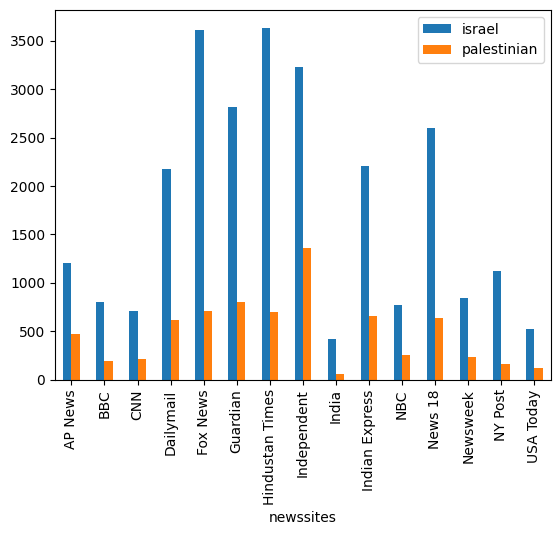

In [ ]:
headline_df[['newssites', 'israel', 'palestinian']].plot(kind="bar", x="newssites")

<Axes: xlabel='newssites'>

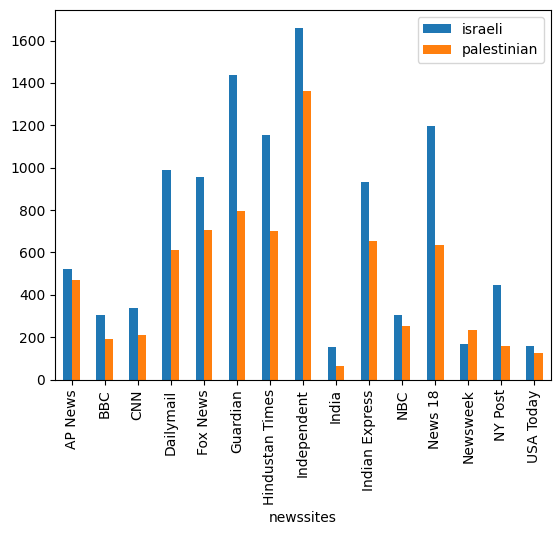

In [ ]:
headline_df[['newssites', 'israeli', 'palestinian']].plot(kind="bar", x="newssites")

<Axes: xlabel='newssites'>

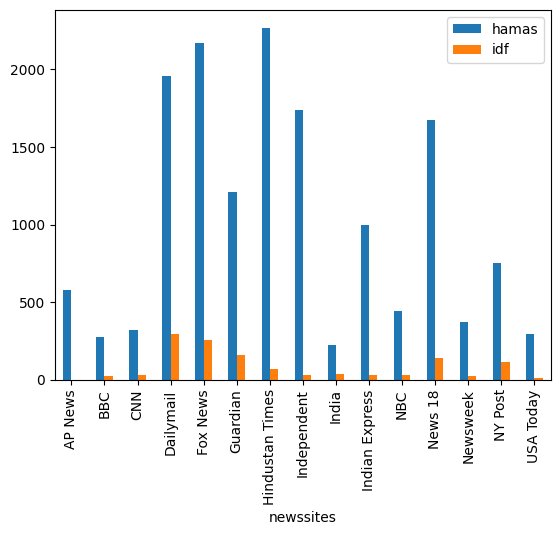

In [ ]:
headline_df[['newssites', 'hamas', 'idf']].plot(kind="bar", x="newssites")

In [ ]:
headline_df_sorted = headline_df.sort_values(by="region")

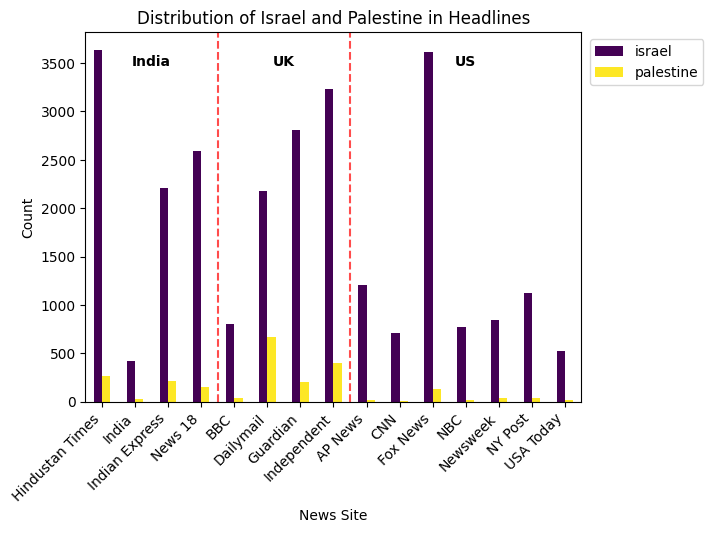

In [ ]:
ax = headline_df_sorted[['newssites', 'israel', 'palestine']].plot(kind="bar", x="newssites", xlabel="News Site", ylabel="Count", title="Distribution of Israel and Palestine in Headlines", colormap='viridis')
ax.set_xticklabels(headline_df_sorted['newssites'], rotation=45, ha="right")


region_boundaries = [4, 8]
region_names = ["India", "UK", "US"]

y_max = ax.get_ylim()[1]

for i, pos in enumerate(region_boundaries):
    if pos < len(headline_df_sorted):
        ax.axvline(x=pos - 0.5, color='red', linestyle='--', alpha=0.7)

region_centers = []
region_centers.append(region_boundaries[0] / 2 - 0.5)

middle_center = (region_boundaries[0] + region_boundaries[1]) / 2 - 0.5
region_centers.append(middle_center)

last_center = (region_boundaries[-1] + len(headline_df_sorted)) / 2 - 0.5
region_centers.append(last_center)

for i, center in enumerate(region_centers):
    ax.text(center, y_max*0.9, region_names[i],
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.legend(loc='upper right', bbox_to_anchor=(1.26, 1))

ax.figure.savefig('israelpalestineheadlines.png', bbox_inches="tight")